In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]
df['return_t5'] = np.log(1 + df['return_t5'])
df['return_t30'] = np.log(1 + df['return_t30'])

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y_train_5d

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [4]:
X_train

array([[ 0.        , -0.0661398 , -0.08338161, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.14156356, -0.14618251, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.17793121, -0.23445731, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.        , -0.14041215, -0.02224561, ...,  0.333     ,
         0.        ,  0.        ],
       [ 1.        , -0.11878354, -0.08883121, ...,  0.522     ,
         0.761     ,  0.935     ],
       [ 1.        , -0.08664781, -0.04919024, ...,  0.534     ,
         0.46      ,  0.548     ]])

In [5]:
X_train.shape

(34481, 11)

In [6]:
X_test.shape

(17240, 11)

In [7]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [8]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [9]:
# Fit the model
history = model.fit(
    X_train, y_train_5d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6887 - acc: 0.5476 - val_loss: 0.6901 - val_acc: 0.5328
Epoch 2/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6871 - acc: 0.5477 - val_loss: 0.6899 - val_acc: 0.5328
Epoch 3/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6862 - acc: 0.5477 - val_loss: 0.6899 - val_acc: 0.5328
Epoch 4/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6854 - acc: 0.5477 - val_loss: 0.6897 - val_acc: 0.5328
Epoch 5/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6847 - acc: 0.5476 - val_loss: 0.6897 - val_acc: 0.5317
Epoch 6/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6842 - acc: 0.5487 - val_loss: 0.6896 - val_acc: 0.5350
Epoch 7/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6836 - acc: 0.5487 - val_loss: 0.6897 - 

27584/27584 [==============================] - 0s 8us/step - loss: 0.6773 - acc: 0.5761 - val_loss: 0.6874 - val_acc: 0.5542
Epoch 60/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6772 - acc: 0.5753 - val_loss: 0.6872 - val_acc: 0.5553
Epoch 61/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6772 - acc: 0.5763 - val_loss: 0.6874 - val_acc: 0.5530
Epoch 62/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6771 - acc: 0.5760 - val_loss: 0.6869 - val_acc: 0.5544
Epoch 63/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6771 - acc: 0.5754 - val_loss: 0.6874 - val_acc: 0.5521
Epoch 64/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6770 - acc: 0.5762 - val_loss: 0.6873 - val_acc: 0.5515
Epoch 65/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6769 - acc: 0.5761 - val_loss: 0.6871 - val_acc: 0.5534
Epoch 66/1000
27584/27584 [==============

Epoch 118/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6751 - acc: 0.5758 - val_loss: 0.6858 - val_acc: 0.5534
Epoch 119/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6751 - acc: 0.5755 - val_loss: 0.6856 - val_acc: 0.5542
Epoch 120/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6751 - acc: 0.5755 - val_loss: 0.6857 - val_acc: 0.5531
Epoch 121/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6750 - acc: 0.5753 - val_loss: 0.6858 - val_acc: 0.5526
Epoch 122/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6750 - acc: 0.5763 - val_loss: 0.6855 - val_acc: 0.5534
Epoch 123/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6750 - acc: 0.5753 - val_loss: 0.6853 - val_acc: 0.5542
Epoch 124/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6750 - acc: 0.5762 - val_loss: 0.6855 - val_acc: 0.5546
Epoch 125/1000
27584

27584/27584 [==============================] - 0s 8us/step - loss: 0.6742 - acc: 0.5775 - val_loss: 0.6849 - val_acc: 0.5539
Epoch 177/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6742 - acc: 0.5774 - val_loss: 0.6849 - val_acc: 0.5537
Epoch 178/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6742 - acc: 0.5787 - val_loss: 0.6849 - val_acc: 0.5539
Epoch 179/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6742 - acc: 0.5779 - val_loss: 0.6847 - val_acc: 0.5546
Epoch 180/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6741 - acc: 0.5781 - val_loss: 0.6849 - val_acc: 0.5530
Epoch 181/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6741 - acc: 0.5779 - val_loss: 0.6847 - val_acc: 0.5557
Epoch 182/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6741 - acc: 0.5777 - val_loss: 0.6848 - val_acc: 0.5528
Epoch 183/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6736 - acc: 0.5799 - val_loss: 0.6846 - val_acc: 0.5531
Epoch 235/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6736 - acc: 0.5795 - val_loss: 0.6844 - val_acc: 0.5565
Epoch 236/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6736 - acc: 0.5800 - val_loss: 0.6846 - val_acc: 0.5531
Epoch 237/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6736 - acc: 0.5807 - val_loss: 0.6844 - val_acc: 0.5544
Epoch 238/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6736 - acc: 0.5797 - val_loss: 0.6844 - val_acc: 0.5563
Epoch 239/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6736 - acc: 0.5804 - val_loss: 0.6843 - val_acc: 0.5563
Epoch 240/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6735 - acc: 0.5787 - val_loss: 0.6842 - val_acc: 0.5588
Epoch 241/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6732 - acc: 0.5815 - val_loss: 0.6841 - val_acc: 0.5595
Epoch 293/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6731 - acc: 0.5824 - val_loss: 0.6839 - val_acc: 0.5652
Epoch 294/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6732 - acc: 0.5816 - val_loss: 0.6842 - val_acc: 0.5604
Epoch 295/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6732 - acc: 0.5816 - val_loss: 0.6840 - val_acc: 0.5636
Epoch 296/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6732 - acc: 0.5818 - val_loss: 0.6839 - val_acc: 0.5637
Epoch 297/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6732 - acc: 0.5813 - val_loss: 0.6840 - val_acc: 0.5630
Epoch 298/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6731 - acc: 0.5821 - val_loss: 0.6842 - val_acc: 0.5607
Epoch 299/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6729 - acc: 0.5827 - val_loss: 0.6837 - val_acc: 0.5679
Epoch 351/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6729 - acc: 0.5835 - val_loss: 0.6838 - val_acc: 0.5653
Epoch 352/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6729 - acc: 0.5829 - val_loss: 0.6837 - val_acc: 0.5694
Epoch 353/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6729 - acc: 0.5838 - val_loss: 0.6837 - val_acc: 0.5679
Epoch 354/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6729 - acc: 0.5827 - val_loss: 0.6841 - val_acc: 0.5605
Epoch 355/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6729 - acc: 0.5820 - val_loss: 0.6840 - val_acc: 0.5631
Epoch 356/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6729 - acc: 0.5839 - val_loss: 0.6842 - val_acc: 0.5588
Epoch 357/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6727 - acc: 0.5838 - val_loss: 0.6834 - val_acc: 0.5668
Epoch 409/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6727 - acc: 0.5824 - val_loss: 0.6836 - val_acc: 0.5676
Epoch 410/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6727 - acc: 0.5834 - val_loss: 0.6836 - val_acc: 0.5681
Epoch 411/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6728 - acc: 0.5827 - val_loss: 0.6837 - val_acc: 0.5644
Epoch 412/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6727 - acc: 0.5820 - val_loss: 0.6837 - val_acc: 0.5656
Epoch 413/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6727 - acc: 0.5844 - val_loss: 0.6836 - val_acc: 0.5647
Epoch 414/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6727 - acc: 0.5818 - val_loss: 0.6837 - val_acc: 0.5676
Epoch 415/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6725 - acc: 0.5836 - val_loss: 0.6838 - val_acc: 0.5614
Epoch 467/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6726 - acc: 0.5838 - val_loss: 0.6837 - val_acc: 0.5685
Epoch 468/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6726 - acc: 0.5847 - val_loss: 0.6841 - val_acc: 0.5595
Epoch 469/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6726 - acc: 0.5836 - val_loss: 0.6838 - val_acc: 0.5634
Epoch 470/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6725 - acc: 0.5835 - val_loss: 0.6839 - val_acc: 0.5611
Epoch 471/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6726 - acc: 0.5839 - val_loss: 0.6838 - val_acc: 0.5589
Epoch 472/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6725 - acc: 0.5835 - val_loss: 0.6839 - val_acc: 0.5620
Epoch 473/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6724 - acc: 0.5842 - val_loss: 0.6837 - val_acc: 0.5649
Epoch 525/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6724 - acc: 0.5850 - val_loss: 0.6837 - val_acc: 0.5668
Epoch 526/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6724 - acc: 0.5842 - val_loss: 0.6837 - val_acc: 0.5631
Epoch 527/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6724 - acc: 0.5840 - val_loss: 0.6840 - val_acc: 0.5591
Epoch 528/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6724 - acc: 0.5855 - val_loss: 0.6836 - val_acc: 0.5643
Epoch 529/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6724 - acc: 0.5833 - val_loss: 0.6838 - val_acc: 0.5601
Epoch 530/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6724 - acc: 0.5847 - val_loss: 0.6835 - val_acc: 0.5678
Epoch 531/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6723 - acc: 0.5858 - val_loss: 0.6836 - val_acc: 0.5594
Epoch 583/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6722 - acc: 0.5846 - val_loss: 0.6835 - val_acc: 0.5662
Epoch 584/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6723 - acc: 0.5847 - val_loss: 0.6839 - val_acc: 0.5576
Epoch 585/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6722 - acc: 0.5841 - val_loss: 0.6840 - val_acc: 0.5581
Epoch 586/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6723 - acc: 0.5853 - val_loss: 0.6833 - val_acc: 0.5660
Epoch 587/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6723 - acc: 0.5837 - val_loss: 0.6834 - val_acc: 0.5644
Epoch 588/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6723 - acc: 0.5855 - val_loss: 0.6834 - val_acc: 0.5642
Epoch 589/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6721 - acc: 0.5854 - val_loss: 0.6842 - val_acc: 0.5575
Epoch 641/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6721 - acc: 0.5858 - val_loss: 0.6837 - val_acc: 0.5592
Epoch 642/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6720 - acc: 0.5854 - val_loss: 0.6836 - val_acc: 0.5650
Epoch 643/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6721 - acc: 0.5854 - val_loss: 0.6835 - val_acc: 0.5639
Epoch 644/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6721 - acc: 0.5865 - val_loss: 0.6836 - val_acc: 0.5602
Epoch 645/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6721 - acc: 0.5859 - val_loss: 0.6834 - val_acc: 0.5592
Epoch 646/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6721 - acc: 0.5854 - val_loss: 0.6837 - val_acc: 0.5631
Epoch 647/1000
27584/27584 [======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6720 - acc: 0.5860 - val_loss: 0.6833 - val_acc: 0.5646
Epoch 699/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6720 - acc: 0.5861 - val_loss: 0.6834 - val_acc: 0.5660
Epoch 700/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6720 - acc: 0.5866 - val_loss: 0.6834 - val_acc: 0.5659
Epoch 701/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6720 - acc: 0.5863 - val_loss: 0.6839 - val_acc: 0.5592
Epoch 702/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6720 - acc: 0.5866 - val_loss: 0.6836 - val_acc: 0.5646
Epoch 703/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6720 - acc: 0.5866 - val_loss: 0.6838 - val_acc: 0.5620
Epoch 704/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6720 - acc: 0.5857 - val_loss: 0.6834 - val_acc: 0.5655
Epoch 705/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 9us/step - loss: 0.6719 - acc: 0.5858 - val_loss: 0.6837 - val_acc: 0.5623
Epoch 757/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6719 - acc: 0.5869 - val_loss: 0.6836 - val_acc: 0.5566
Epoch 758/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6719 - acc: 0.5864 - val_loss: 0.6836 - val_acc: 0.5598
Epoch 759/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6719 - acc: 0.5852 - val_loss: 0.6837 - val_acc: 0.5614
Epoch 760/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6719 - acc: 0.5864 - val_loss: 0.6836 - val_acc: 0.5611
Epoch 761/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6719 - acc: 0.5870 - val_loss: 0.6841 - val_acc: 0.5540
Epoch 762/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6718 - acc: 0.5860 - val_loss: 0.6844 - val_acc: 0.5552
Epoch 763/1000
27584/27584 [======

27584/27584 [==============================] - 0s 10us/step - loss: 0.6717 - acc: 0.5873 - val_loss: 0.6834 - val_acc: 0.5678
Epoch 815/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6718 - acc: 0.5871 - val_loss: 0.6835 - val_acc: 0.5653
Epoch 816/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6718 - acc: 0.5865 - val_loss: 0.6834 - val_acc: 0.5685
Epoch 817/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6718 - acc: 0.5865 - val_loss: 0.6837 - val_acc: 0.5585
Epoch 818/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6718 - acc: 0.5870 - val_loss: 0.6836 - val_acc: 0.5595
Epoch 819/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6718 - acc: 0.5876 - val_loss: 0.6837 - val_acc: 0.5598
Epoch 820/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6717 - acc: 0.5862 - val_loss: 0.6839 - val_acc: 0.5589
Epoch 821/1000
27584/27584 [

27584/27584 [==============================] - 0s 10us/step - loss: 0.6716 - acc: 0.5858 - val_loss: 0.6835 - val_acc: 0.5575
Epoch 873/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6716 - acc: 0.5877 - val_loss: 0.6835 - val_acc: 0.5585
Epoch 874/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6716 - acc: 0.5873 - val_loss: 0.6835 - val_acc: 0.5591
Epoch 875/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6716 - acc: 0.5869 - val_loss: 0.6836 - val_acc: 0.5578
Epoch 876/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6715 - acc: 0.5871 - val_loss: 0.6836 - val_acc: 0.5575
Epoch 877/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6715 - acc: 0.5874 - val_loss: 0.6834 - val_acc: 0.5611
Epoch 878/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6715 - acc: 0.5869 - val_loss: 0.6839 - val_acc: 0.5589
Epoch 879/1000
27584/27584 [==

27584/27584 [==============================] - 0s 9us/step - loss: 0.6714 - acc: 0.5877 - val_loss: 0.6839 - val_acc: 0.5578
Epoch 931/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6714 - acc: 0.5871 - val_loss: 0.6835 - val_acc: 0.5573
Epoch 932/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6714 - acc: 0.5872 - val_loss: 0.6834 - val_acc: 0.5604
Epoch 933/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6714 - acc: 0.5873 - val_loss: 0.6836 - val_acc: 0.5562
Epoch 934/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6714 - acc: 0.5863 - val_loss: 0.6836 - val_acc: 0.5576
Epoch 935/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6714 - acc: 0.5872 - val_loss: 0.6833 - val_acc: 0.5591
Epoch 936/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6714 - acc: 0.5873 - val_loss: 0.6836 - val_acc: 0.5569
Epoch 937/1000
27584/27584 [====

27584/27584 [==============================] - 0s 10us/step - loss: 0.6712 - acc: 0.5852 - val_loss: 0.6829 - val_acc: 0.5626
Epoch 989/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6713 - acc: 0.5856 - val_loss: 0.6834 - val_acc: 0.5571
Epoch 990/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6712 - acc: 0.5853 - val_loss: 0.6830 - val_acc: 0.5595
Epoch 991/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6712 - acc: 0.5861 - val_loss: 0.6832 - val_acc: 0.5581
Epoch 992/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6712 - acc: 0.5861 - val_loss: 0.6834 - val_acc: 0.5575
Epoch 993/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6712 - acc: 0.5870 - val_loss: 0.6832 - val_acc: 0.5582
Epoch 994/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6712 - acc: 0.5858 - val_loss: 0.6841 - val_acc: 0.5605
Epoch 995/1000
27584/27584 [

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002863A3EA2E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002863B46DB38>]], dtype=object)

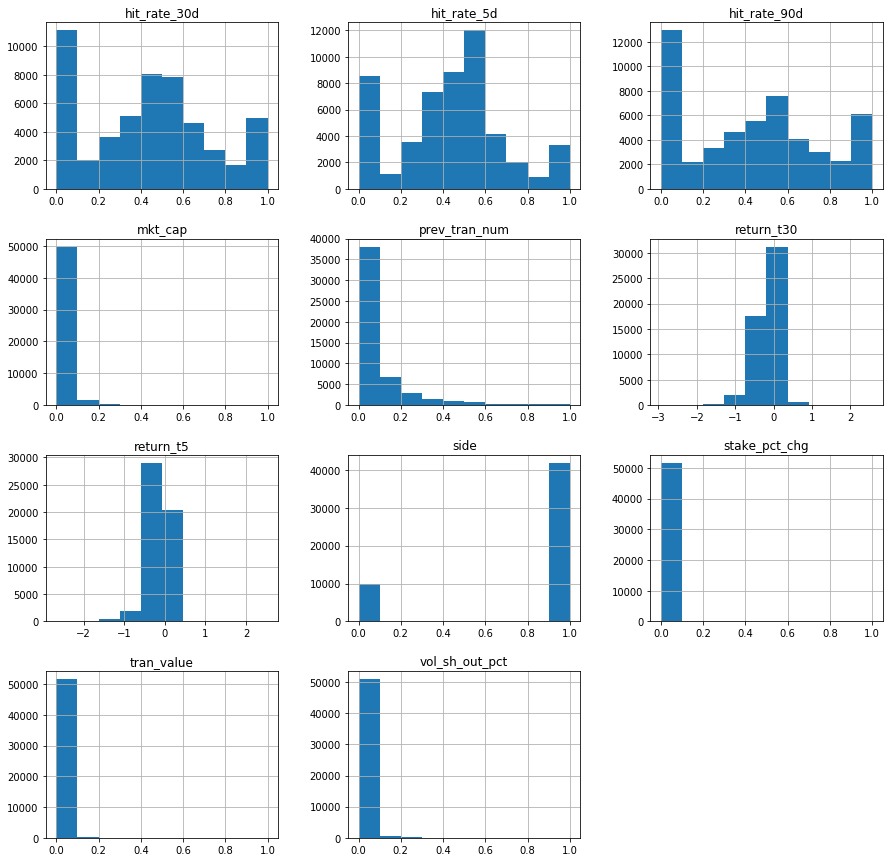

In [10]:
df[col_list].hist(figsize = [15,15])

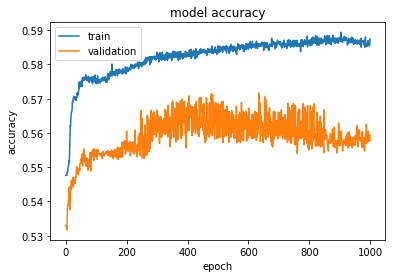

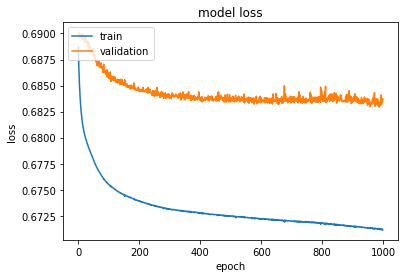

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
# evaluate the model
scores = model.evaluate(X_train, y_train_5d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_5d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 17us/step
[Train] acc: 58.08%
17240/17240 [==============================] - 0s 17us/step
[Test] acc: 57.13%
